# Electrodynamics of the Equatorial Ionosphere II
#### By Amadi Brians C.
##### bamadi@brianspace.org

In [1]:
#=========== Import Packages =============
    
import os
import glob
import shutil
import matplotlib
import numpy as np
import pandas as pd
import datetime as dt
from pathlib import Path
import cartopy.crs as ccrs
from netCDF4 import Dataset 
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import cartopy.feature as cfeature
from netCDF4 import date2num, num2date
import matplotlib.gridspec as gridspec
from IPython.display import Video, display, HTML

import sys
import requests
import datetime
from urllib.parse import quote

#This user-defined package contains instruction for downloading
#download some files from zenodo, necessary to make 
#some plots such as magnetic equator, etc.
sys.path.append("..")  # path to your helper script folder
from utils.zenodo_tools import get_from_zenodo
from utils.get_dependencies import ensure_dependencies

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", message=".*get_cmap function was deprecated.*")

#### Observed Dynamics of the Equatorial Ionosphere
- Plasma can drift in the vertical, zonal or meridional directions. See details about these directions in [Electrodynamic Variables I](notebooks/Electrodynamic_variables_1.ipynb). The magnitude of these velocities vary relative to each other and time. Here is a summary of these variations.
1. $V_{peak-eastward} \approx 2 \times V_{peak-westward}$: Ion velocity is denoted by V. The peak of the eastward velocity is about twice the peak of the westward velocity for a given day.  
2. $V_{zonal} > V_{vert}$: The zonal velocity almost always exceed the vertical velocity of ions (plasma).
3. $V_{pss} > V_{avg-ion}$: The vertical velocity at about post-sunset much exceed the average vertical velocity of plasma.
4. $U_{east}$: The eastward wind strongly exist after sunset, but before midnight. 

- So, what is the source of these observe dynamics.

#### Source of $V_{eastward}$ $(V_{zonal})$

- There are two theories postulating the source of zonal velocity of ions.

**Theory I**

- It is a fundamental feature of plasma (Vasyliunas and Song, 2005). No electric field is required for plasma drift.

**Theory II**

- It starts with the eastward flow of neutral winds. This causes relative motion between ions and electrons under the influence of Earth's magnetic field.

- This motion induces an electric field **E** represented as:
\begin{equation}
\textbf{E} = -(u_x \times \textbf{B})
\end{equation}

- Using cross-product rule (right hand rule)\
$x \times y = z$\
$y \times z = x$\
$z \times x = y$

$u_x \implies$ eastward = x

$\textbf{B} \implies$ northward = y

- Therefore,
\begin{equation}
-(u_x \times \textbf{B}) = -(x \times y) = -z
\end{equation}

- Hence, the direction of $\textbf{E}$ is vertical (z) but downward (-z). This is illustrated in Figure 3.1.

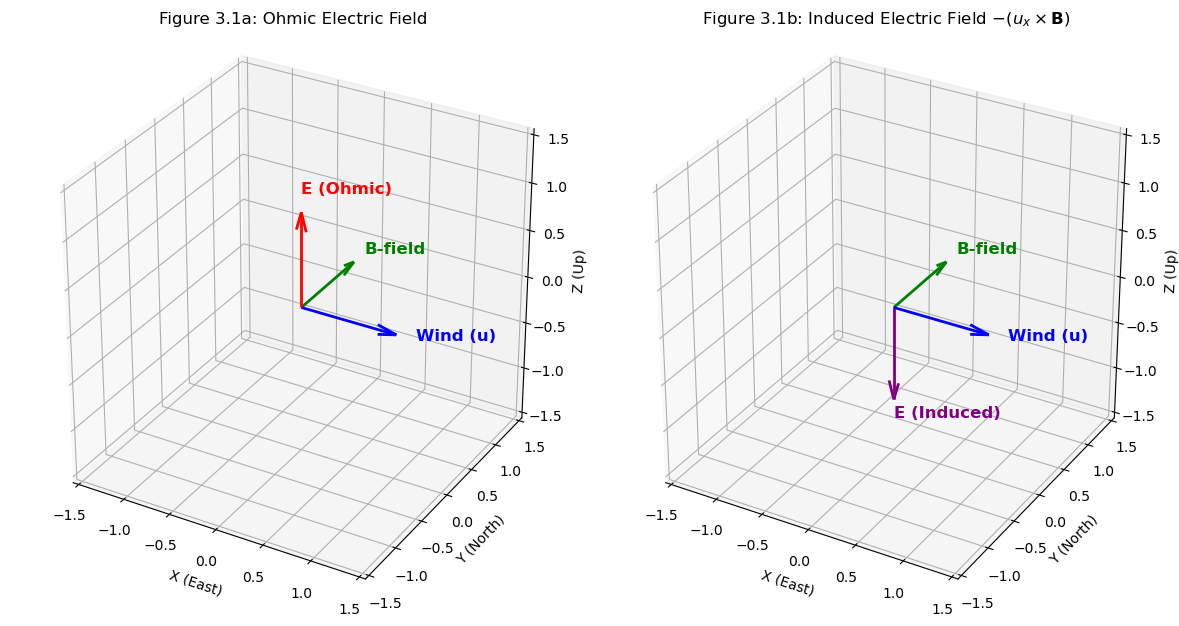

In [2]:
# ========= Direction of E ==========

fig = plt.figure(figsize=(12, 6))

def draw_vectors(ax, vectors, colors, labels):
    for (x, y, z), color, label in zip(vectors, colors, labels):
        ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.2, linewidth=2)
        ax.text(x*1.2, y*1.2, z*1.2, label, color=color, fontsize=12, weight='bold')

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_xlabel('X (East)')
    ax.set_ylabel('Y (North)')
    ax.set_zlabel('Z (Up)')
    ax.set_box_aspect([1,1,1])  # Equal aspect

# Case 1: Ohmic E-field (upward)
ax1 = fig.add_subplot(121, projection='3d')
vectors1 = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]  # u, B, E_ohmic
colors1 = ['blue', 'green', 'red']
labels1 = ['Wind (u)', 'B-field', 'E (Ohmic)']
draw_vectors(ax1, vectors1, colors1, labels1)
ax1.set_title("Figure 3.1a: Ohmic Electric Field")

# Case 2: Induced E-field (downward)
ax2 = fig.add_subplot(122, projection='3d')
vectors2 = [(1, 0, 0), (0, 1, 0), (0, 0, -1)]  # u, B, E_induced
colors2 = ['blue', 'green', 'purple']
labels2 = ['Wind (u)', 'B-field', 'E (Induced)']
draw_vectors(ax2, vectors2, colors2, labels2)
ax2.set_title("Figure 3.1b: Induced Electric Field $-({u}_x \\times \\mathbf{B})$")

plt.tight_layout()
plt.show()


#### Source of $V_{eastward}$ $(V_{zonal})$ Contd.

- Since **E** is perpendicular to **B**, the resulting agent causes plasma to drift in a direction orthogonal to both **E** and B. The question is, in what direction is this drift?

- Again, using the cross product rule, 

**E** is downward, that is, -z

**B** is northward, that is, +y

Therefore,
\begin{equation}
(\textbf{E} \times \textbf{B}) = -z \times y = -(z \times y)
\end{equation}

- But,
\begin{equation}
-(z \times y) = -(-x) = x
\end{equation}

- Hence, plasma will drift eastward (x). This is one source of eastward drift or eastward velocity $(V_{eastward})$. This is illustrated in Figure 3.2.

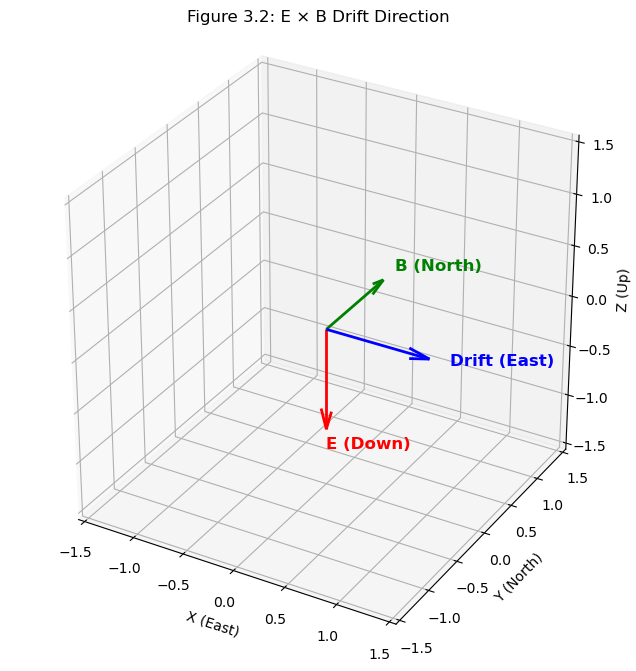

In [3]:
# ======== Plot Direction of Drift Velocity ========

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Define vectors
E = np.array([0, 0, -1])  # downward
B = np.array([0, 1, 0])   # northward
v_d = np.cross(E, B)      # ExB drift

# Function to plot vectors
def plot_vector(ax, vec, color, label):
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2],
              color=color, arrow_length_ratio=0.2, linewidth=2)
    ax.text(vec[0]*1.2, vec[1]*1.2, vec[2]*1.2, label,
            color=color, fontsize=12, weight='bold')

# Plot all vectors
plot_vector(ax, E, 'red', 'E (Down)')
plot_vector(ax, B, 'green', 'B (North)')
plot_vector(ax, v_d, 'blue', 'Drift (East)')

# Axes settings
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set_xlabel('X (East)')
ax.set_ylabel('Y (North)')
ax.set_zlabel('Z (Up)')
ax.set_box_aspect([1,1,1])
ax.set_title("Figure 3.2: E × B Drift Direction")

plt.show()

#### Source of $V_{upward}$ $(V_{vertical})$

- From the perspective of dynamo, the source of vertical drift or $V_{vertical}$ is also the neutral winds.

- This motion induces an electric field **E** also represented as:
\begin{equation}
\textbf{E} = -(u_z \times \textbf{B})
\end{equation}

- Again, using cross-product rule (right hand rule)\
$x \times y = z$\
$y \times z = x$\
$z \times x = y$

$u_z \implies$ upward => z

$\textbf{B} \implies$ northward => y

- Therefore, the induced **E** will be:
\begin{equation}
-(u_z \times \textbf{B}) = -(z \times y) = -(-x) = x
\end{equation}

- Hence, the direction of $\textbf{E}$ is zonal (x) and eastward (+x). See Figure 3.3 for illustration.


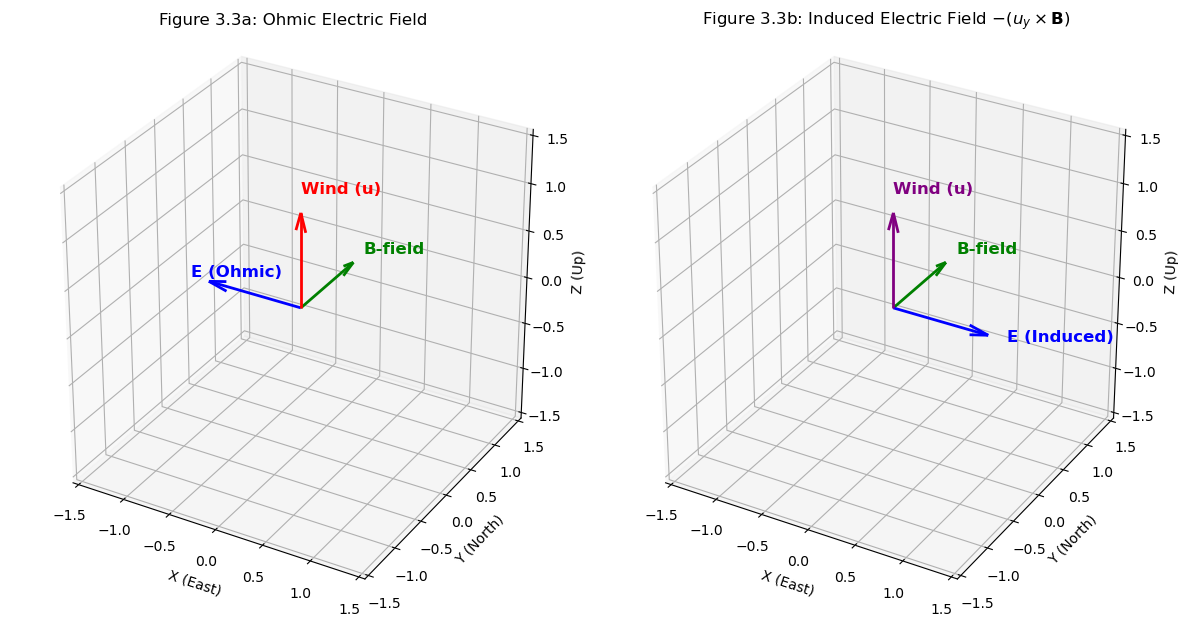

In [4]:
# ========= Direction of E ==========

fig = plt.figure(figsize=(12, 6))

def draw_vectors(ax, vectors, colors, labels):
    for (x, y, z), color, label in zip(vectors, colors, labels):
        ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.2, linewidth=2)
        ax.text(x*1.2, y*1.2, z*1.2, label, color=color, fontsize=12, weight='bold')

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_xlabel('X (East)')
    ax.set_ylabel('Y (North)')
    ax.set_zlabel('Z (Up)')
    ax.set_box_aspect([1,1,1])  # Equal aspect

# Case 1: Ohmic E-field (upward)
ax1 = fig.add_subplot(121, projection='3d')
vectors1 = [(-1, 0, 0), (0, 1, 0), (0, 0, 1)]  # u, B, E_ohmic
colors1 = ['blue', 'green', 'red']
labels1 = ['E (Ohmic)', 'B-field', 'Wind (u)']
draw_vectors(ax1, vectors1, colors1, labels1)
ax1.set_title("Figure 3.3a: Ohmic Electric Field")

# Case 2: Induced E-field (downward)
ax2 = fig.add_subplot(122, projection='3d')
vectors2 = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]  # u, B, E_induced
colors2 = ['blue', 'green', 'purple']
labels2 = ['E (Induced)', 'B-field', 'Wind (u)']
draw_vectors(ax2, vectors2, colors2, labels2)
ax2.set_title("Figure 3.3b: Induced Electric Field $-({u}_y \\times \\mathbf{B})$")


plt.tight_layout()
plt.show()

#### Source of $V_{upward}$ $(V_{vertical})$ Contd.

- Since **E** is perpendicular to **B**, the resulting agent causes plasma to drift in a direction orthogonal to both **E** and B. The question then becomes, in what direction is this drift?

- Again, using the cross product rule, 

**E** is eastward, that is, +x

**B** is northward, that is, +y

- Therefore,
\begin{equation}
(\textbf{E} \times \textbf{B}) = x \times y = z
\end{equation}

- Hence, plasma will drift upward (z). This is one source of upward drift $(V_{upward})$. Figure 3.4 shows the direction of drift of plasma (upwards) when the forcing (variables) are oriented east and north ($\textbf{E}$ and $\textbf{B}$).

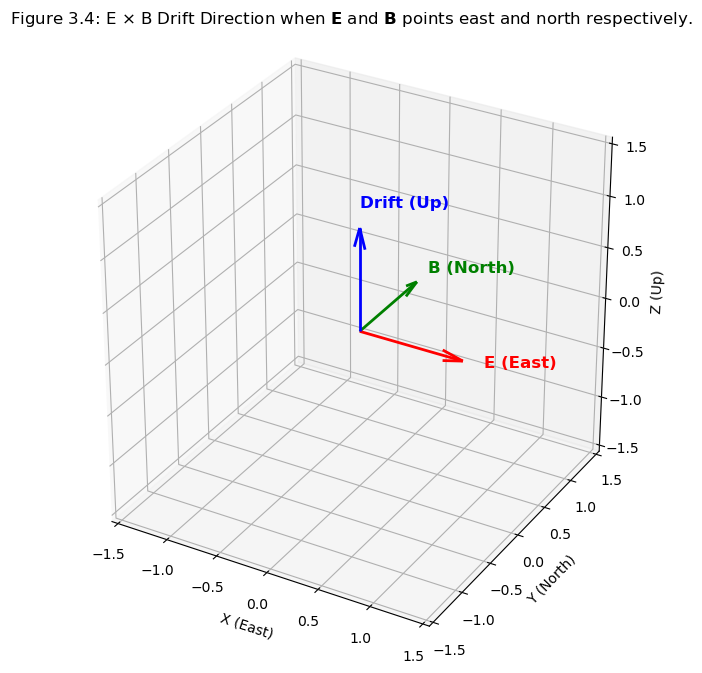

In [6]:
# ======== Plot Direction of Drift Velocity ========

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Define vectors
E = np.array([1, 0, 0])  # downward
B = np.array([0, 1, 0])   # northward
v_d = np.cross(E, B)      # ExB drift

# Function to plot vectors
def plot_vector(ax, vec, color, label):
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2],
              color=color, arrow_length_ratio=0.2, linewidth=2)
    ax.text(vec[0]*1.2, vec[1]*1.2, vec[2]*1.2, label,
            color=color, fontsize=12, weight='bold')

# Plot all vectors
plot_vector(ax, E, 'red', 'E (East)')
plot_vector(ax, B, 'green', 'B (North)')
plot_vector(ax, v_d, 'blue', 'Drift (Up)')

# Axes settings
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set_xlabel('X (East)')
ax.set_ylabel('Y (North)')
ax.set_zlabel('Z (Up)')
ax.set_box_aspect([1,1,1])
ax.set_title("Figure 3.4: E × B Drift Direction when $\\mathbf{E}$ and $\\mathbf{B}$ points east and north respectively.")

plt.show()


##### A final thought

- Upward (vertical) wind $\implies$ Eastward (zonal) **E** $\implies$ vertical drift

- Eastward (Zonal) wind $\implies$ Upward (vertical) **E** $\implies$ zonal drift

- Northward (meridional) wind $\implies$ No **E** 

- Why is this the case?
    - Recall that:
    \begin{equation}
    \textbf{E} = -(u \times \textbf{B})
    \end{equation}
    - Both u and B are both northward.

- From cross-product rule,
    \begin{equation}
    (u \times \textbf{B}) = 0
    \end{equation}
- If u and B are parallel or antiparallel to each other. Hence, no electric field, **E**, is induced.

#### References:
1. Eurico R. de Paula. (2021). Postgraduate Lecture notes on Space Geophysics [PowerPoint slides]. Instituto Nacional de Pesquisas Espaciais (INPE), Sao Jose dos Campos, Brazil.
2. Kelley, M. C. (2009). The Earth’s ionosphere: Plasma physics and electrodynamics (2nd ed.). Academic Press.
3. Vasyliunas, V. M., and Song, P. (2005). Meaning of ionospheric Joule heating. J. Geophys. Res. 110, A02301, doi:10.1029/2004JA010615.
